# Understanding Over & Underfitting
## Predicting Boston Housing Prices

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

In [1]:
#Libraries 
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

### Import and explore the data. Clean the data for outliers and missing values. 

In [2]:
boston = pd.read_csv(r"C:\Users\maria\Desktop\Ironhack\Lab\Module3\Week7\lab-problems-in-ml\data\boston_data.csv")

In [3]:
boston.head(1)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7


In [4]:
boston.shape

(404, 14)

In [5]:
#Checking is nan values
boston.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [6]:
# Make scatter plot with y being the multivariate

In [7]:
##Checking outliers
#Check all outliers (in each collum) based on if they are 3 std aways
boston.drop(np.where(np.abs(stats.zscore(boston)) > 3)[0],inplace=False)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,0.06899,0.0,25.65,0.0,0.581,5.870,69.7,2.2577,2.0,188.0,19.1,389.15,14.37,22.0
397,0.10084,0.0,10.01,0.0,0.547,6.715,81.6,2.6775,6.0,432.0,17.8,395.59,10.16,22.8
398,0.67191,0.0,8.14,0.0,0.538,5.813,90.3,4.6820,4.0,307.0,21.0,376.88,14.81,16.6
399,9.32909,0.0,18.10,0.0,0.713,6.185,98.7,2.2616,24.0,666.0,20.2,396.90,18.13,14.1


In [8]:
#Check all outliers (in each collum) based on if they are 1.3 IQR away
q1 = boston.quantile(0.25)
q3 = boston.quantile(0.75)
IQR = q3 - q1
boston.drop(boston[((boston < (q1 - 1.5 * IQR)) |(boston > (q3 + 1.5 * IQR))).any(axis=1)].index, inplace=False)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,0.06899,0.0,25.65,0.0,0.581,5.870,69.7,2.2577,2.0,188.0,19.1,389.15,14.37,22.0
397,0.10084,0.0,10.01,0.0,0.547,6.715,81.6,2.6775,6.0,432.0,17.8,395.59,10.16,22.8
398,0.67191,0.0,8.14,0.0,0.538,5.813,90.3,4.6820,4.0,307.0,21.0,376.88,14.81,16.6
399,9.32909,0.0,18.10,0.0,0.713,6.185,98.7,2.2616,24.0,666.0,20.2,396.90,18.13,14.1


### Next, we want to explore the data. Pick several varibables you think will be ost correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.

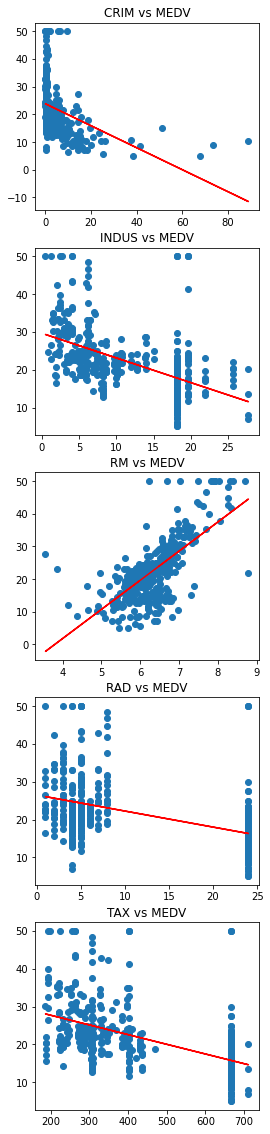

In [9]:
# I believe some of the most correlated variables will be CRIM, RM, INDUS, RAD, TAX
variables_interest=["crim", "indus", "rm", "rad", "tax"]

def best_fit_slope(x,y):
    m = (((np.mean(x)*np.mean(y)) - np.mean(x*y)) /
         ((np.mean(x)*np.mean(x)) - np.mean(x*x)))
    b = np.mean(y) - m*np.mean(x)
    regression_line = [(m*X)+b for X in x]
    return regression_line

fig, ax = plt.subplots(len(variables_interest), figsize=(4,20))
for index, value in enumerate(variables_interest):
    ax[index].scatter(boston[value],boston['medv'])      
    ax[index].plot(boston[value],best_fit_slope(boston[value],boston['medv']), color="r")
    ax[index].title.set_text(value.upper()+" vs MEDV")


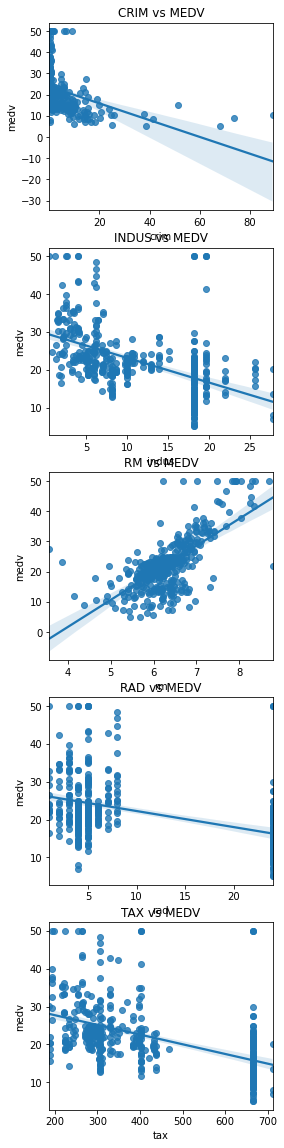

In [27]:
fig, ax = plt.subplots(len(variables_interest), figsize=(4,20))
for index, value in enumerate(variables_interest):
    sns.regplot(x=value, y='medv', data=boston, ax=ax[index])     
    ax[index].title.set_text(value.upper()+" vs MEDV")

### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

In [13]:
# Not all relations are as expected, for instance crim does't seem to be as correlated as expected. Though in hidsight if crime
#is low the prices will still vary a lot. We can however, say that it seeems to have a more exponential behavior.
#In matter of fact the one varibale that seems to have a truly (approximatly, strong) linear relation with medv is the rm. 
#Though TAX, rad and Indus seem to have a good correlation, this is watered down by the existence of big outliers.

### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

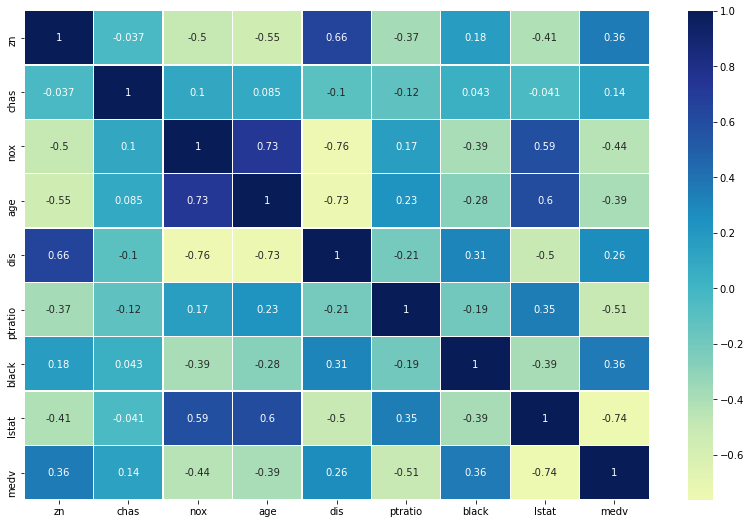

In [14]:
other_variables = boston.drop(variables_interest,axis=1, inplace=False).corr()
# Generate a mask for the upper triangle
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(14, 9))
sns.heatmap(other_variables, annot=True, cmap = "YlGnBu", center=0,linewidths=.2)

In [15]:
#lstat and ptratio seem to also be variable with a relatively high correlation with the medv, that I hadn't considered

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation. 

In [16]:
boston["medv"].describe()

count    404.000000
mean      22.312376
std        8.837019
min        5.000000
25%       17.100000
50%       21.400000
75%       25.000000
max       50.000000
Name: medv, dtype: float64

----

## Developing a Model

In [17]:
#libraries 
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

### Implementation: Define a Performance Metric
What is the performance meteric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [18]:
def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    correlation_matrix = np.corrcoef(y_predict, y_true)
    correlation_xy = correlation_matrix[0,1]
    r_squared = correlation_xy**2
    return r_squared
## DOuble check !!!!!!!!!!

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test. 

In [19]:
x = boston.drop("medv", axis=1, inplace=False)
y = boston["medv"]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

Now, plot the score for each tree on the training set and on the testing set.

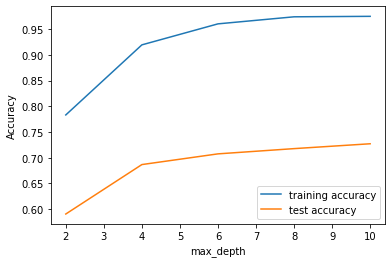

In [20]:
training_accuracy = []
test_accuracy = []
max_depth = range(2, 11,2)
for depth in max_depth:
    model = RandomForestRegressor(max_depth=depth)
    model.fit(X_train, y_train)
    training_accuracy.append(model.score(X_train, y_train))
    test_accuracy.append(model.score(X_test, y_test))

plt.plot(max_depth, training_accuracy, label="training accuracy")
plt.plot(max_depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("max_depth")
plt.legend()

What do these results tell you about the effect of the depth of the trees on the performance of the model?

In [21]:
# It seems that more or less the higher the depth the better the accuracy for both training and testing, 
# but within the range checked it appears that we are allwas overfitting

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10? Check out this article before answering: https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-165e6942b229

In [22]:
# For both max depth of 1 and 10 the model seems to suffer from high variance as the accuracy of the training data is far
# superior than the test data and so there it indicates an overfit model that can generalize well
#Summing up, if for a given depth the accuracy of tainnig is above the test tgen there is variance, if it's the other way around
#we are dealing with bias

### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

In [23]:
# I would say max_depth equal to 8 because first I would chosse something that wouldn't be higher than the number and columns
# and so taking into account the previous graphical representation 8 seems to allow for the higher test accuracy
# and lower train accuracy than the values after it
model = RandomForestRegressor(max_depth=8)
model.fit(X_train, y_train)
print("Train accuracy",model.score(X_train, y_train))
print("Test accuracy",model.score(X_test, y_test))

Train accuracy 0.9730267930591936
Test accuracy 0.7296776895574097


### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

In [24]:
# I wouldn't use it b/c apparently the dataset is old, most of the features aren't characteristics of the house, but rather
# of the area, and though some may be of importance, not only has what people find relevant shifted with time but also 
# houses in the same zone with different "interal charactereisitcs" (ex:rooms, bathooms,...) have different prices, but due to 
# the features being mainly relating to the zone (from my undersatnding) this would be lost on the algorithm.
# Moreover, according to the accuracy values this seems to be an overfittted model, so changes would have to be made. Nevertheless,
# if we intend to generalize we must do it for simlar conditions (ex: houses in Boston aren't comparable to the ones in Lisbon)
# So this model would only be applicaple to zones with similar conditions as those of urban Boston (specially as most of
#the firures as mentioned are regarding the zone)